In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/root/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
   
Monty 	1 	0 	0 	1 	0 	0
Python 	1 	1 	0 	1 	0 	0
sketch 	1 	1 	0 	0 	0 	0
laugh 	1 	1 	0 	1 	0 	0
funny 	0 	3 	0 	1 	0 	0
best 	1 	1 	1 	0 	1 	0
ice cr 	0 	0 	1 	0 	1 	1
desse 	0 	0 	1 	0 	1 	0
taste 	0 	0 	1 	0 	1 	2

In [7]:
ice_com = pd.DataFrame(index=(['Monty','Python','sketch','laugh',
                               'funny','best','ice_cream','dessert',
                              'taste']))

In [12]:
ice_com['1'] = [1,1,1,1,0,1,0,0,0] 
ice_com['2'] = [0,1,1,1,3,1,0,0,0] 
ice_com['3'] = [0,0,0,0,0,1,1,1,1] 
ice_com['4'] = [1,1,0,1,1,0,0,0,0] 
ice_com['5'] = [0,0,0,0,0,1,1,1,1] 
ice_com['6'] = [0,0,0,0,0,0,1,0,2]
ice_com['df']= [2,3,2,3,2,4,3,2,3]
ice_com['cf']= [2,3,2,3,4,4,3,2,4]

In [18]:
ice_com['idf'] = np.log2(6/ice_com.df)

In [26]:
cols = [str(i) for i in range(1,7)]

In [30]:
for col in cols:
    ice_com[col+'a'] = round(ice_com[col] * ice_com.idf,4)

In [31]:
ice_com

,1,2,3,4,5,6,df,cf,idf,1a,2a,3a,4a,5a,6a
Monty,1,0,0,1,0,0,2,2,1.584963,1.585,0.0000,0.000,1.585,0.000,0.0
Python,1,1,0,1,0,0,3,3,1.000000,1.000,1.0000,0.000,1.000,0.000,0.0
sketch,1,1,0,0,0,0,2,2,1.584963,1.585,1.5850,0.000,0.000,0.000,0.0
laugh,1,1,0,1,0,0,3,3,1.000000,1.000,1.0000,0.000,1.000,0.000,0.0
funny,0,3,0,1,0,0,2,4,1.584963,0.000,4.7549,0.000,1.585,0.000,0.0
best,1,1,1,0,1,0,4,4,0.584963,0.585,0.5850,0.585,0.000,0.585,0.0
ice_cream,0,0,1,0,1,1,3,3,1.000000,0.000,0.0000,1.000,0.000,1.000,1.0
dessert,0,0,1,0,1,0,2,2,1.584963,0.000,0.0000,1.585,0.000,1.585,0.0
taste,0,0,1,0,1,2,3,4,1.000000,0.000,0.0000,1.000,0.000,1.000,2.0


In [33]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
nltk.download('punkt')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1948
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])



Percent variance captured by all components: 45.192181258903716
Component 0:
" Oh !     0.999289
" Oh !     0.999289
" Oh !     0.999289
" Oh !"    0.999289
" Oh !     0.999289
" Oh !     0.999289
" Oh !     0.999289
" Oh !     0.999289
" Oh !"    0.999289
" Oh !     0.999289
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.633756
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.582865
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it a bad thing ."    0.560199
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elt

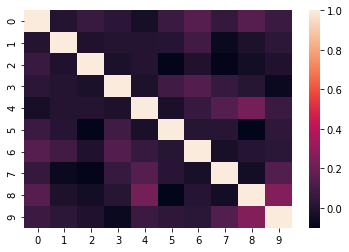

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [36]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


#Drill 0. do all of that ^ to x_test

In [47]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
# Run SVD on the testing data, then project the testng data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 49.35161189113613
Component 0:
" Oh !         0.999923
" Oh no !      0.999923
" Oh !         0.999923
" Oh !         0.999923
" Oh !         0.999923
" Me ! oh !    0.999923
" Oh !         0.999923
" Oh !         0.999923
" Oh !         0.999923
" Oh !         0.999923
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.612372
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                               

the first component (0) is still the oh!s withs some oh no! sprinkled in.

the second component is a collection of sentences, most of which have something to do with mairrage, leaving, or social meetings

the thirs is the Ahs

and the fourth is a collection of affirmative statements, not necessarily involing emma


Drill 1 tweak the vectorizer

In [49]:
vectorizer = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35%the paragraphs
                             min_df=5, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 5, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 799
Percent variance captured by all components: 67.23047924325702


In [51]:
vectorizer = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35%the paragraphs
                             min_df=10, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 10, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 382
Percent variance captured by all components: 76.54645142116253


In [52]:
vectorizer = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35%the paragraphs
                             min_df=15, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 15, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 232
Percent variance captured by all components: 87.22118822284499


In [54]:
vectorizer = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35%the paragraphs
                             min_df=20, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 20, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 155
Percent variance captured by all components: 96.66899909455871


In [57]:
vectorizer = TfidfVectorizer(max_df=0.35, # drop words that occur in more than 35%the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 25, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 144
Percent variance captured by all components: 98.12710224508949


In [58]:
#looks good so far by increasing the min_df to use words that only occur at lease 21 times,
#the features are down to 144 wtih 98% variance explained

In [59]:
vectorizer = TfidfVectorizer(max_df=0.50, # drop words that occur in more than 35%the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 20, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 144
Percent variance captured by all components: 98.12404392988397


In [60]:
vectorizer = TfidfVectorizer(max_df=0.2, # drop words that occur in more than 35%the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 20, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 144
Percent variance captured by all components: 98.12662340948917


In [66]:
vectorizer = TfidfVectorizer(max_df=.99, # drop words that occur in more than 35%the paragraphs
                             min_df=21, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l1', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#changed max df to .35 min df to 20, penalty to L1

#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])
emma_tf_lsa = lsa.fit_transform(emma_paras_tfidf)
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)


Number of features: 144
Percent variance captured by all components: 98.12751797416732


Looks like increasing max_df and min_df really helped eliminate features while still being able explain alot of the variance.